In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

news_data = pd.read_csv('./OnlineNewsPopularity.csv')
news_data.head()

# Regresja liniowa z usunięciem wartości odstających

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
news_data.shape

(39644, 61)

In [3]:
print("\nFirst artcile in database")
print(news_data.iloc[0,:])


First artcile in database
url                              http://mashable.com/2013/01/07/amazon-instant-...
 timedelta                                                                     731
 n_tokens_title                                                                 12
 n_tokens_content                                                              219
 n_unique_tokens                                                          0.663594
                                                       ...                        
 title_subjectivity                                                            0.5
 title_sentiment_polarity                                                  -0.1875
 abs_title_subjectivity                                                          0
 abs_title_sentiment_polarity                                               0.1875
 shares                                                                        593
Name: 0, Length: 61, dtype: object


In [4]:
#SPRAWDZENIE PUSTYCH WARTOŚCI
news_data.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

Macierz korelacji


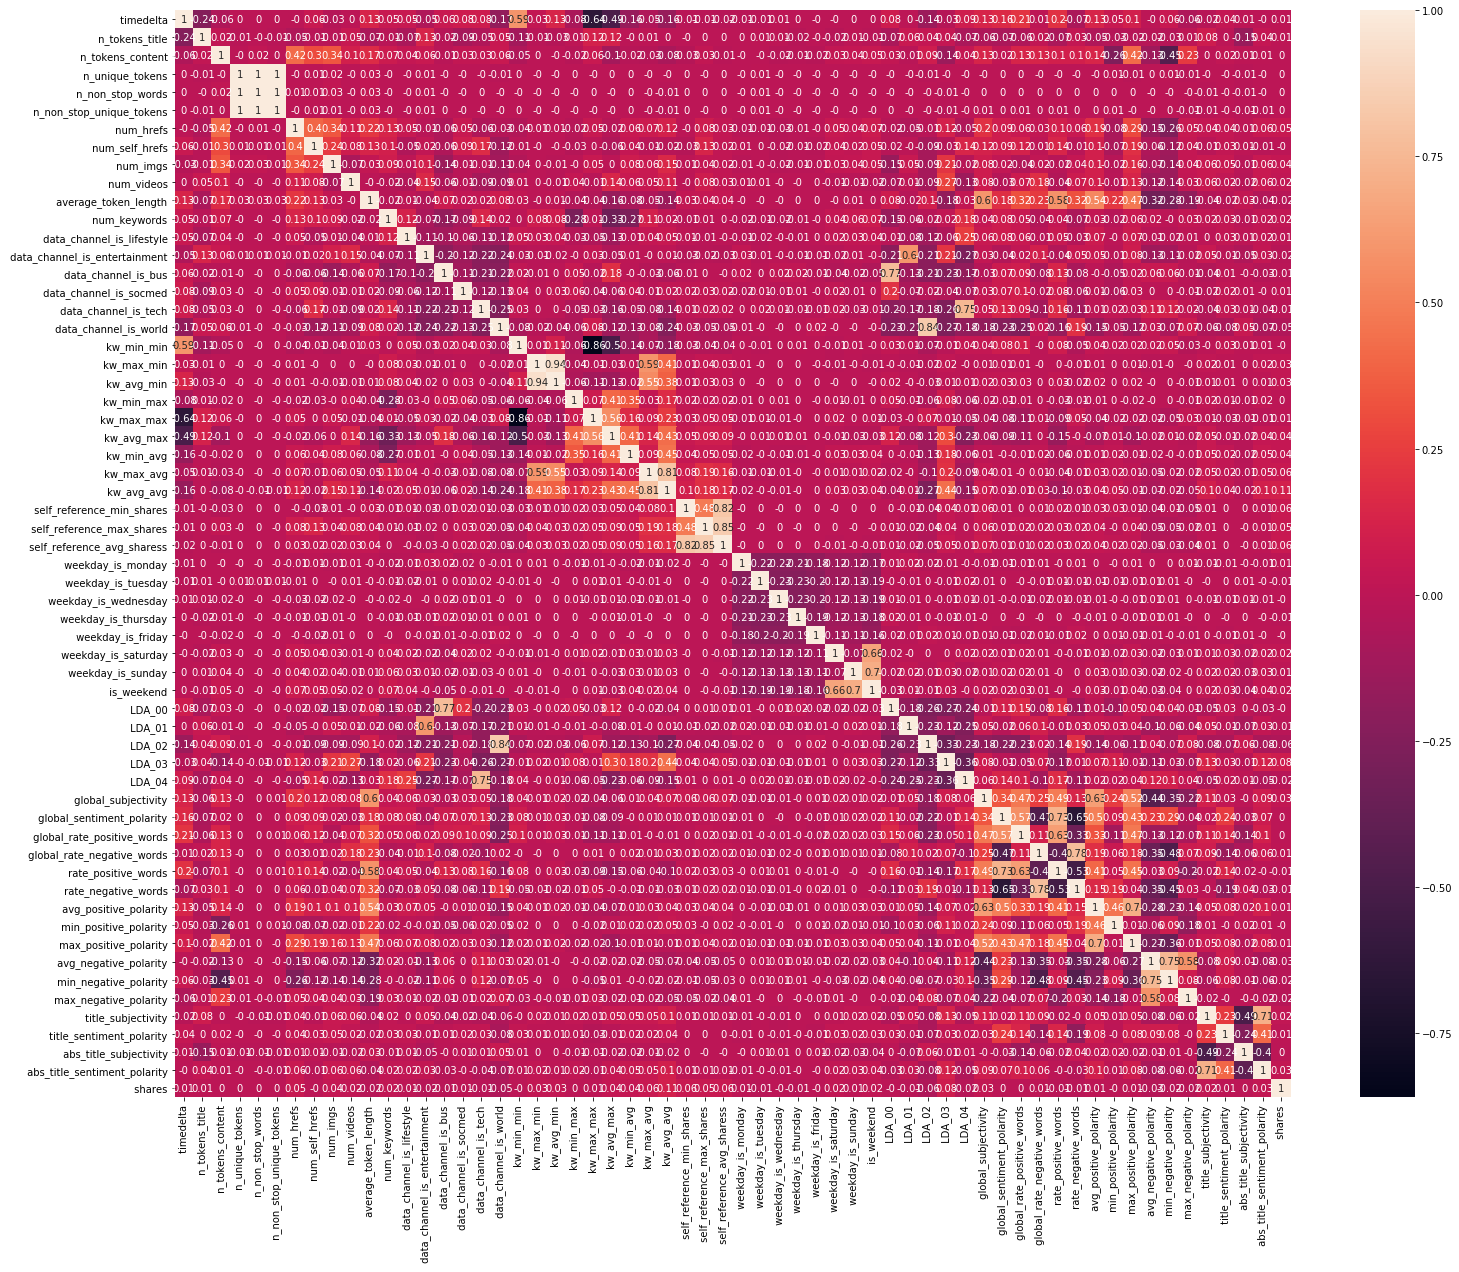

In [5]:
#Tworzenie macierzy korelacji, która mierzy zależności liniowe między zmiennymi.
fig = plt.subplots(figsize=(25,20))  
corr_matrix = news_data.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)
print("Macierz korelacji")

In [5]:
#Sprawdzenie korelacji
corrmat = news_data.corr()
corrmat[' shares'].sort_values(ascending=False)


 shares                           1.000000
 kw_avg_avg                       0.110413
 LDA_03                           0.083771
 kw_max_avg                       0.064306
 self_reference_avg_sharess       0.057789
 self_reference_min_shares        0.055958
 self_reference_max_shares        0.047115
 num_hrefs                        0.045404
 kw_avg_max                       0.044686
 kw_min_avg                       0.039551
 num_imgs                         0.039388
 global_subjectivity              0.031604
 kw_avg_min                       0.030406
 kw_max_min                       0.030114
 abs_title_sentiment_polarity     0.027135
 num_videos                       0.023936
 title_subjectivity               0.021967
 num_keywords                     0.021818
 is_weekend                       0.016958
 weekday_is_saturday              0.015082
 title_sentiment_polarity         0.012772
 avg_positive_polarity            0.012142
 max_positive_polarity            0.010068
 weekday_is

In [6]:
news_data = news_data.drop(['url'], axis=1)

Text(0, 0.5, 'shares')

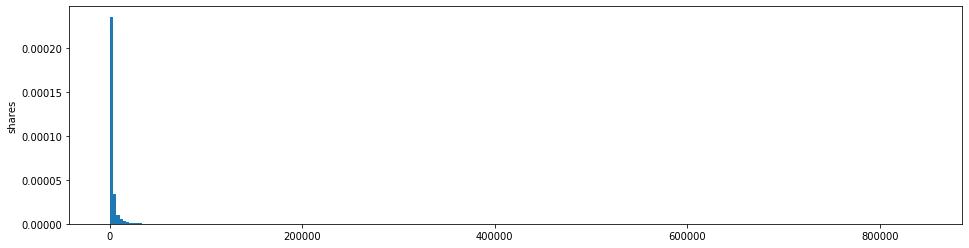

In [7]:
#Wartości odstające - Wykres

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16.0
fig_size[1] = 4.0

x = news_data[' shares']
plt.hist(x, density=True, bins=250)
plt.ylabel('shares')


In [8]:
#Usuwanie wartości odstających
Q1 = news_data[' shares'].quantile(0.25)
Q3 = news_data[' shares'].quantile(0.75)
IQR = Q3 - Q1
LTV= Q1 - (1.5 * IQR)
UTV= Q3 + (1.5 * IQR)
fixedData = news_data.drop(news_data[news_data[' shares'] > UTV].index)
fixedData.shape

(35103, 60)

In [24]:
print(f'Dane przed usunięciem wartości odstających = {news_data.shape}')
print(f'Dane po usunięciu wartości odstających = {fixedData.shape}')
print(f'Liczba wartości odstających = {news_data.shape[0] - fixedData.shape[0]}')

Dane przed usunięciem wartości odstających = (39644, 60)
Dane po usunięciu wartości odstających = (35103, 60)
Liczba wartości odstających = 4541


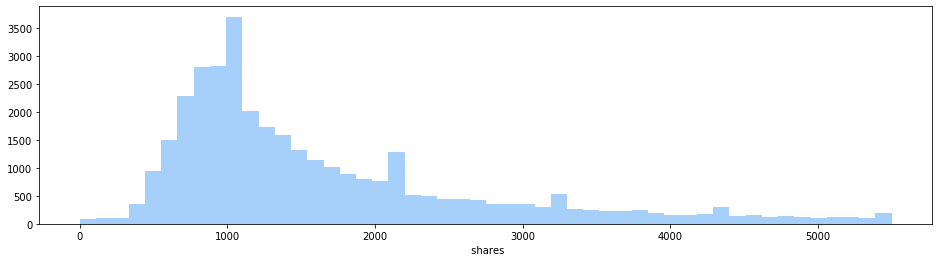

In [30]:
plt.subplots(figsize=(16,4))
sns.distplot(fixedData[' shares'], hist=True, kde=False, color='#2289F0')

In [12]:
#Korelacja w fixedData
corrmat = fixedData.corr()
corrmat[' shares'].sort_values(ascending=False)

 shares                           1.000000
 kw_avg_avg                       0.147678
 is_weekend                       0.139997
 data_channel_is_socmed           0.114944
 weekday_is_saturday              0.101764
 data_channel_is_tech             0.097379
 weekday_is_sunday                0.089757
 kw_min_avg                       0.089510
 LDA_04                           0.086734
 num_hrefs                        0.077652
 LDA_00                           0.075626
 num_keywords                     0.065535
 global_rate_positive_words       0.063263
 global_sentiment_polarity        0.063261
 kw_max_avg                       0.063157
 global_subjectivity              0.058290
 self_reference_avg_sharess       0.057195
 num_imgs                         0.055927
 self_reference_max_shares        0.054805
 n_tokens_content                 0.047821
 title_sentiment_polarity         0.045289
 rate_positive_words              0.044742
 self_reference_min_shares        0.044588
 num_self_h

In [14]:
#USTALENIE DANYCH WEJŚCIOWYCH I TARGETU
data = fixedData.iloc[1:,1:-1]
target = fixedData.iloc[1:,-1]

data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286


In [15]:
target.head()

1     711
2    1500
3    1200
4     505
5     855
Name:  shares, dtype: int64

In [16]:
# STANDARYZACJA
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[0.38888889, 0.03284389, 0.6047431 , ..., 0.5       , 1.        ,
        0.        ],
       [0.38888889, 0.02717671, 0.57512955, ..., 0.5       , 1.        ,
        0.        ],
       [0.38888889, 0.06839258, 0.5037879 , ..., 0.5       , 1.        ,
        0.        ],
       ...,
       [0.44444444, 0.05692942, 0.51635516, ..., 0.56818182, 0.09090909,
        0.13636364],
       [0.22222222, 0.08784132, 0.53949331, ..., 0.5       , 1.        ,
        0.        ],
       [0.44444444, 0.02022154, 0.70198678, ..., 0.625     , 0.33333333,
        0.25      ]])

In [17]:
#DZIELENIE DANYCH NA MODELE UCZĄCE I TESTOWE

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (31591, 58)
target_train: (31591,)

Testing dataset:
data_test: (3511, 58)
target_test: (3511,)


In [18]:
#UCZENIE MODELU
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#PRZEWIDYWANIE
prediction_linear = linear_regression.predict(data_test)

In [20]:
df_someXdata = pd.DataFrame(linear_regression.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(10)

,Actual shares,Predicted shares
0,1600,1974.0
1,417,1724.0
2,3800,2236.0
3,1000,1792.0
4,3200,1550.0
5,210,1706.0
6,766,1486.0
7,4700,2130.0
8,597,1360.0
9,3600,1930.0


Wykres predykcji


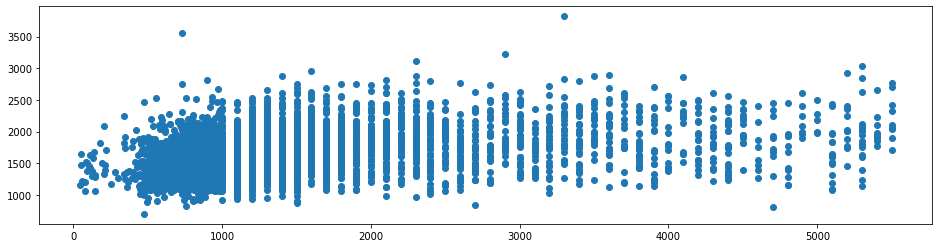

In [21]:
#WYKRES PREDYKCJI
plt.scatter(target_test, prediction_linear)
print("Wykres predykcji")


In [22]:
#Ocena jakości metodą średniego błędu kwadratowego
from sklearn.metrics import mean_squared_error
mse =  mean_squared_error(target_test, prediction_linear)
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)


Średni błąd kwadratu wyuczonego modelu: 1055258.01
Pierwiastek średniego błędu kwadratowego: 1027.26


In [23]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(target_test, linear_regression.predict(data_test)))

Variance score: 0.12
